# The Power Of Plots
---

### Analysis
* Mouse weight had good correlation with tumor volume.
* Remicane had the lowest volume tumor size. 
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Doing imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

# Import CSVs
MouseData = "data/Mouse_metadata.csv"
Results = "data/Study_results.csv"

# Read a comma-separated values (csv) file into DataFrame
MouseData = pd.read_csv(MouseData)
Results = pd.read_csv(Results)

# Show how the data looks
MouseData.head()
Results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Get rid of duplicate mouse id 
MouseData.drop_duplicates(subset ="Mouse ID", 
                     keep = False, inplace = True) 
  
# Display with dups removed
MouseData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Merge data
Merged = pd.merge(MouseData, Results, on="Mouse ID", how="left")
Merged.head()

## Summary statistics

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Gen summary stats

mean = Merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
variance = Merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = Merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
median = Merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
SEM = Merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
SumDataFrame = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": SEM})
SumDataFrame

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [5]:
# Making a bar plot for number of mice per regimen throughout the study
GroupedDF = pd.DataFrame(Merged.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
RegimenData = GroupedDF[["Drug Regimen","Mouse ID"]]
RegimenData = RegimenData.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
RegimenData = RegimenData.set_index("Drug Regimen")

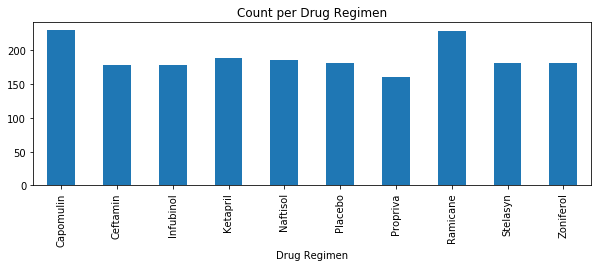

<Figure size 432x288 with 0 Axes>

In [6]:
# Use DataFrame.plot() in order to create a bar chart of the data
RegimenData.plot(kind="bar", figsize=(10,3), legend=False)

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

# BAR Plot using pyplot

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = GroupedDF.index.tolist()
drug_regimens

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
# Convert regimen count into a list
regimen_count = (Merged.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [9]:
x_axis = np.arange(len(regimen_count))

<BarContainer object of 10 artists>

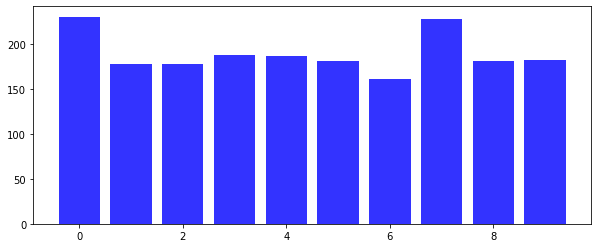

In [10]:
# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.8, align="center")

## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(Merged.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [12]:
# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.sort_values(by=['Sex'], inplace=True, ascending=False)
gender_df.head()

,Sex,Count
1,Male,958
0,Female,935


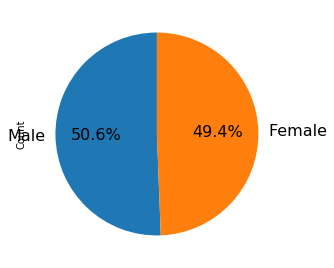

In [13]:
# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

# PIE PLOT using pyplot

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (Merged.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

In [15]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x26141e3a908>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Female'),
  Text(1.0997996703027118, -0.02099250347258625, 'Male')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.5998907292560246, -0.011450456439592499, '50.6%')])

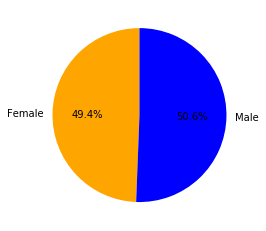

In [16]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=90)

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
Merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = Merged.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [19]:
# Select data for Capomulin regimen and reset index
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()    

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [20]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"LowerQuartile: {lowerq}")
print(f"UpperQuartile: {upperq}")
print(f"InterQuartile: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} Outlier?.")
print(f"Values above {upper_bound} Outlier?.")

LowerQuartile: 32.37735684
UpperQuartile: 40.1592203
InterQuartile: 7.781863460000004
Median: 37.31184577 
Values below 20.70456164999999 Outlier?.
Values above 51.83201549 Outlier?.


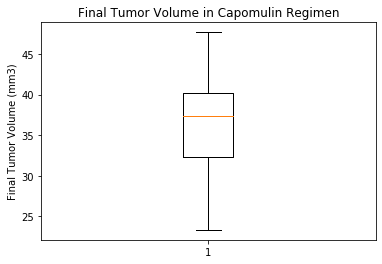

In [22]:
# Example outlier plot of final total volume
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [23]:
# Select data for Ramicane regimen and reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [24]:
# Convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [25]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"LowerQuartile: {lowerq}")
print(f"UpperQuartile: {upperq}")
print(f"InterQuartile: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} Outlier?.")
print(f"Values above {upper_bound} Outlier?.")

LowerQuartile: 30.981175224999998
UpperQuartile: 38.508305307499995
InterQuartile: 7.527130082499998
Median: 34.848627300000004 
Values below 19.690480101250003 Outlier?.
Values above 49.79900043124999 Outlier?.


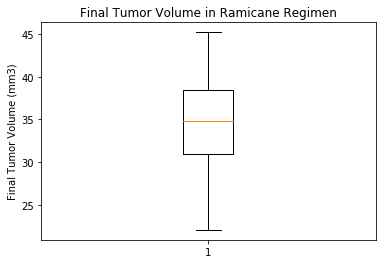

In [26]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_list)
plt.show()

In [27]:
# Select data for Infubinol regimen and reset index
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [28]:
# Convert column "Tumor Volume" of the Infubinol regimen into a dataframe object
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [29]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"LowerQuartile: {lowerq}")
print(f"UpperQuartile: {upperq}")
print(f"InterQuartile: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} Outlier?.")
print(f"Values above {upper_bound} Outlier?.")

LowerQuartile: 62.75445141
UpperQuartile: 67.68556862
InterQuartile: 4.9311172099999965
Median: 66.08306589 
Values below 55.35777559500001 Outlier?.
Values above 75.08224443499999 Outlier?.


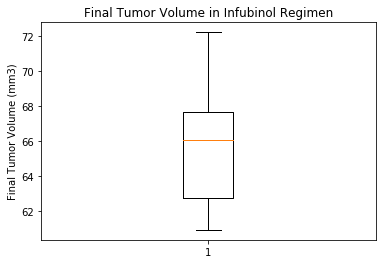

In [30]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

In [31]:
# Select data for Ceftamin regimen and reset index
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [32]:
# Convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [33]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"LowerQuartile: {lowerq}")
print(f"UpperQuartile: {upperq}")
print(f"InterQuartile: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} Outlier?.")
print(f"Values above {upper_bound} Outlier?.")

LowerQuartile: 61.43389223
UpperQuartile: 67.52748237
InterQuartile: 6.093590140000003
Median: 64.29983003 
Values below 52.29350701999999 Outlier?.
Values above 76.66786758 Outlier?.


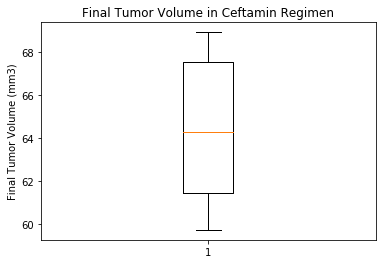

In [34]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

## Multiple Boxplots For Final Tumor Volume

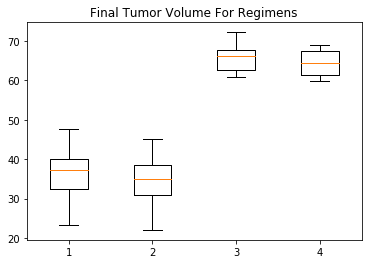

In [35]:
data = [cap_list, ram_list, inf_list, cef_list]
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume For Regimens')
ax7.boxplot(data)
plt.show()

## Line and scatter plots

In [36]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# Create a new DataFrame that looks into Capomulin
capomulin_df = Merged.loc[Merged["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


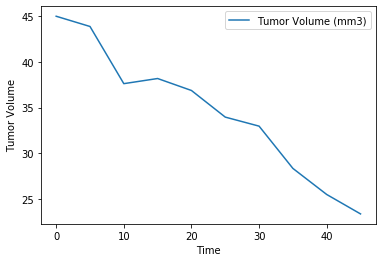

In [37]:
cap_single_df.plot("Timepoint", "Tumor Volume (mm3)")
plt.ylabel('Tumor Volume')
plt.xlabel('Time')
plt.show()

# SCATTER PLOT

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [39]:
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [40]:
# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [41]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [42]:
# Rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [43]:
# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

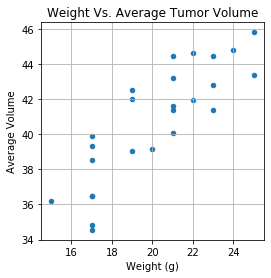

In [44]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

# CORRELATION COEFFICIENT and LINEAR REGRESSION MODEL

In [45]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


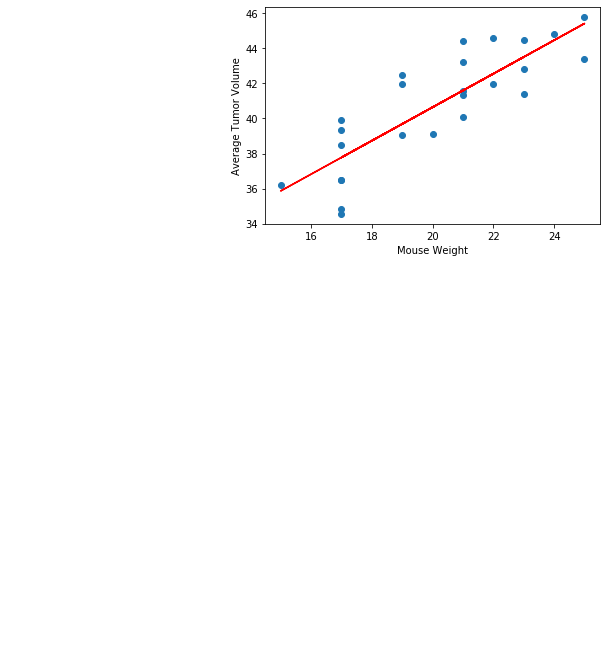

In [46]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()